# 5th lecture on python

Topics of the lecture:

* Polar plots with matplotlib
* Drawing applied vectors to 2D and 3D curves
* Frenet trihedron

## Polar plots

If we have a curve in polar coordinates we have 2 choices:

* Make the change of coordinates and draw it like a usual curve in 'x' and 'y' (orthogonal projection):
  $$x = r \cos{(\theta)}$$
  $$y = r \sin{(\theta)}$$
* Draw it in polar projection: the plot is no longer a rectangle but a circle

In the next cells we examine the [rose curve](https://en.wikipedia.org/wiki/Rose_(mathematics)):

$$r(\theta) = sin(b\theta) \quad \,, b \in \mathbb{N} \quad , $$

with both projections: rectilinear and polar.

We'll fix $b$ at the beginning, but that's just an example. Feel free to modify and play with it.
Remember the following:

* if $b$ is even, the number of petals is $2b$.
* if $b$ is odd, the number of petals is $b$.

**Exercise**: Prove the above statement.

_Hint_: prove that when $b$ is even, each petal has a twin after $\pi/2$ radians.

In [1]:
import numpy as np
print("Calculating the array of values")
b = 5
theta = np.linspace(np.pi/2, 2*np.pi, 1000) # 500 points between 0 and 2*pi
r = np.sin(b*theta) # radius for each theta
x = r * np.cos(theta) # x values
y = r * np.sin(theta) # y values

Calculating the array of values


In [2]:
print("Plot of the rose in rectilinear projection")

Plot of the rose in rectilinear projection


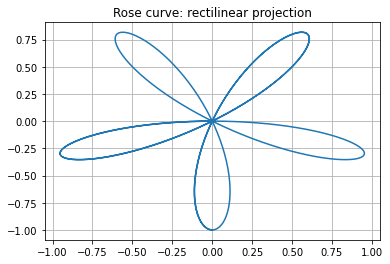

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={'projection': 'rectilinear'}) # defining figure and axes
# NOTE: subplot_kw is a python dictionary: map a value into another. Here 'projection' associated to 'polar'

ax.set_title("Rose curve: rectilinear projection") # setting the title
ax.grid(True) # drawing the grid
ax.plot(x, -y) # plotting the values

plt.savefig("./rose_5_rectilinear.pdf")
plt.show() # showing the plot
plt.close() # cleaning up

In [4]:
print("Now in polar projection")

Now in polar projection


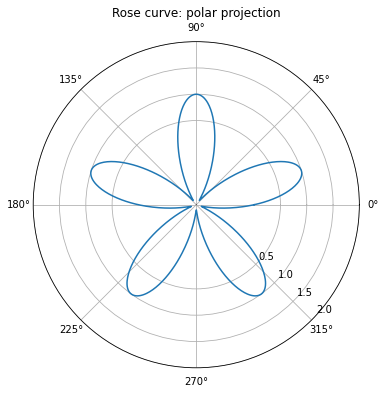

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6), subplot_kw={'projection': 'polar'}) # defining figure and axes
# NOTE: subplot_kw is a python dictionary: map a value into another. Here 'projection' is associated to 'polar'
ax.set_title("Rose curve: polar projection") # setting the title
ax.grid(True) # drawing the grid

ax.plot(theta, r) # plotting the values

r_offset = 0.0 # the distance fron the origin in the plot is (r - r_offset)
ax.set_rorigin(r_offset) # the setting the origin for 'r': values below are ignored
ax.set_rmax(0.5) # 'r' goes from 0 to rmax
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks (obviously it overwrites the previous rmax!)
ax.set_rlabel_position(-42.5)  # Move radial labels away from plotted line

ax.set_thetamin(0) # minimum value of theta
ax.set_thetamax(360) # maximum value of theta

plt.savefig("./rose_"+str(b)+".pdf", dpi=300)

plt.show() # showing the plot
plt.close() # cleaning up

**Homework**

Try to find out the following by yourself:

* Why, in the polar projection, if we set $b$ to an even number, we still get $b$ petals (and not $2b$)?
* In the polar projection negative values of $r$ are simply ignore, So why, if $b$ is odd, we still get $b$ petals in rectilinear and polar projections? 

## Applied vectors

### 2D Plots

In [6]:
import sympy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [7]:
def get_2D_segment(A, B, n=100):
    x = np.linspace(A[0], B[0], n)
    y = np.linspace(A[1], B[1], n)
    return [x, y]

In [8]:
print("Let's now find the velocity of a curve at a given point as the tangent vector to the curve:")
def get_2D_velocity(f, x):
    x_prime = sympy.diff(x, x)
    f_prime = sympy.diff(f, x)
    return [x_prime, f_prime]

Let's now find the velocity of a curve at a given point as the tangent vector to the curve:


In [9]:
def get_2D_velocity_vec(f, x, x0):
    v = get_2D_velocity(f, x) # v(x_0)
    f0 = f.subs(x, x0).evalf() # f(x_0)
    p0 = np.array([float(x0), float(f0)]) # point at which I apply the velocity vector
    v_num = np.zeros(2) # empty numpy array of size 2
    v_num[0] = float(v[0].subs(x, x0).evalf())
    v_num[1] = float(v[1].subs(x, x0).evalf())
    p1 = p0 + v_num
    return get_2D_segment(p0, p1)

In [10]:
print("This is our velocity vector")

x = sympy.symbols("x")
xy_vel = get_2D_velocity_vec(sympy.sin(x), x, np.pi) # velocity at (3/4)*pi
print(get_2D_velocity(sympy.sin(x), x))
print(xy_vel)

This is our velocity vector
[1, cos(x)]
[array([3.14159265, 3.15169366, 3.16179467, 3.17189568, 3.18199669,
       3.1920977 , 3.20219871, 3.21229972, 3.22240073, 3.23250174,
       3.24260275, 3.25270376, 3.26280477, 3.27290578, 3.2830068 ,
       3.29310781, 3.30320882, 3.31330983, 3.32341084, 3.33351185,
       3.34361286, 3.35371387, 3.36381488, 3.37391589, 3.3840169 ,
       3.39411791, 3.40421892, 3.41431993, 3.42442094, 3.43452195,
       3.44462296, 3.45472397, 3.46482498, 3.47492599, 3.485027  ,
       3.49512801, 3.50522902, 3.51533003, 3.52543104, 3.53553205,
       3.54563306, 3.55573407, 3.56583508, 3.57593609, 3.5860371 ,
       3.59613811, 3.60623912, 3.61634013, 3.62644114, 3.63654215,
       3.64664316, 3.65674417, 3.66684518, 3.67694619, 3.6870472 ,
       3.69714821, 3.70724922, 3.71735023, 3.72745124, 3.73755225,
       3.74765326, 3.75775427, 3.76785528, 3.77795629, 3.7880573 ,
       3.79815831, 3.80825932, 3.81836033, 3.82846134, 3.83856235,
       3.84866336, 3.

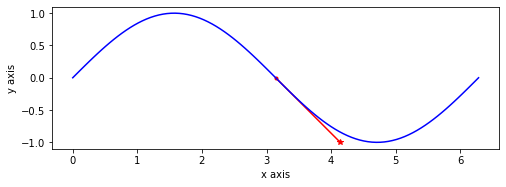

In [11]:
# plt.axes().set_aspect("equal") # same scale on x and y 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.set_xlabel("x axis") # x-axis label
ax.set_ylabel("y axis") # y-axis label

ax.set_aspect("equal") # same scale on x and y 

ax.plot(xy_vel[0], xy_vel[1], color="red") # plot of the velocity vector
ax.plot(xy_vel[0][0], xy_vel[1][0], color="red", marker=".") # marking the application point
ax.plot(xy_vel[0][-1], xy_vel[1][-1], color="red", marker="*") # marking the end of the vector


x_sin = np.linspace(0, 2*np.pi, 100) # 100 points in the inteval [-2,2]
y_sin = np.sin(x_sin) # 'y' values corresponding to the 'x'
ax.plot(x_sin, y_sin, color="blue") # plot of the entire function

plt.savefig("applied_vec.pdf")

plt.show() # showing the plot
plt.close() # closing in order to not mess up next plots

## 3D plots

Here we draw the velocity vector applied to a point of the helix curve.

In [12]:
import sympy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [13]:
def get_3D_segment(A, B, n=100): # n points between A and B        
    x = np.linspace(A[0], B[0], n)
    y = np.linspace(A[1], B[1], n)
    z = np.linspace(A[2], B[2], n)
    return [x, y, z]

In [14]:
def get_3D_velocity(x, y, z, t): # velocity vector of a 3D curve
    vx = sympy.diff(x, t)
    vy = sympy.diff(y, t)
    vz = sympy.diff(z, t)
    return [vx, vy, vz]

def get_3D_velocity_vec(x, y, z, t, t0): # representation of the velocity with a segment
    vel = get_3D_velocity(x, y, z, t) # v(t_0)
    
    x0 = float(x.subs(t,t0).evalf())
    y0 = float(y.subs(t,t0).evalf())
    z0 = float(z.subs(t,t0).evalf())
    p0 = np.array([x0,y0,z0]) # point at which I apply the velocity vector    
    
    v = np.zeros(3) # empty numpy array of size 3
    v[0] = float(vel[0].subs(t, t0).evalf())
    v[1] = float(vel[1].subs(t, t0).evalf())
    v[2] = float(vel[2].subs(t, t0).evalf())
    
    p1 = p0 + v
    return get_3D_segment(p0, p1)

In [15]:
# helix (symbolic expression)
t_symb = sympy.symbols("t")
xh_symb = sympy.cos(t_symb)
yh_symb = sympy.sin(t_symb)
zh_symb = t_symb

display(xh_symb)
display(yh_symb)
display(zh_symb)

cos(t)

sin(t)

t

In [16]:
# helix (numerical points)
th = np.linspace(0, 15, 500)
xh = np.cos(th)
yh = np.sin(th)
zh = th

In [17]:
t0 = 12
v_t0 = get_3D_velocity_vec(xh_symb, yh_symb, zh_symb, t_symb, t0)

Plotting the curve with the velocity vector applied to a point


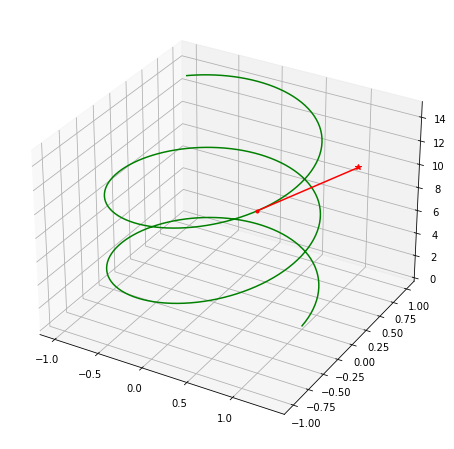

In [18]:
print("Plotting the curve with the velocity vector applied to a point")

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(xh, yh, zh, color="green")
ax.plot(v_t0[0], v_t0[1], v_t0[2], color="red")
ax.plot(v_t0[0][0], v_t0[1][0], v_t0[2][0], marker=".", color="red")
ax.plot(v_t0[0][-1], v_t0[1][-1], v_t0[2][-1], marker="*", color="red")

plt.savefig("./helix.pdf", dpi=600)
plt.show()

### Frenet trihedon

The [Frenet trihedron](https://en.wikipedia.org/wiki/Frenet%E2%80%93Serret_formulas) is a local object, defined by 3 vectors relative to a curve $\vec{r}(t)$:

* The **unit tangent vector**:
  $$\vec{T}(t) = \frac{\frac{d}{dt} \vec{r}(t) }{ ||\frac{d}{dt} \vec{r}(t)|| }$$

* The **normal unit vector**
  $$\vec{N}(t) = \frac{\frac{d}{dt} \vec{T}(t) }{ ||\frac{d}{dt} \vec{T}(t)||}$$

* The **binormal unit vector**
  $$\vec{B}(t) = \vec{T} \times \vec{N}$$

#### Exercises

* Find out where the trihedron is not defined
* Prove that $\vec{N}$ is orthogonal to $\vec{T}$
* Prove that $\vec{B}$ is orthogonal to $\vec{T}$ and $\vec{B}$


In the following we define the functions that find the Frenet trihedron symbolically and numerically.
After that, we'll use them to plot the trihedron in a point of a curve.

In [19]:
def norm_symb(v): # norm of a vector of symbolic expressions
    return sympy.sqrt(v[0]**2 + v[1]**2 + v[2]**2) # norm of the vector  

def normalize_symb(v): # normalize of a vector of symbolic expressions
    n = norm_symb(v)
    v_norm = []
    for vi in v:
        v_norm.append(vi/n)
    return v_norm

def diff_vec(r, t): # derive a vector component-wise
    return [sympy.diff(r[0], t), sympy.diff(r[1], t), sympy.diff(r[2], t)]

def diff_vec_norm(r, t): # normalized derivative of a vector
    return normalize_symb(diff_vec(r,t))

In [20]:
def fren_T(x, y, z, t): # unit tangent vector
    return diff_vec_norm([x, y, z], t)

def fren_N(x, y, z, t): # unit normal vector
    T = fren_T(x,y,z, t)
    return diff_vec_norm(T, t)

def fren_B(x, y, z, t):
    T = sympy.Matrix(fren_T(x,y,z, t)) # converting into matrix to do the cross product
    N = sympy.Matrix(fren_N(x,y,z, t)) # converting into matrix to do the cross product
    B_matr = T.cross(N) # is a sympy matrix. we want a list
    nd = B_matr.shape[0]
    B = []
    for i in range(0,nd):
        B.append(B_matr[i])
    return B

In [21]:
def vec_segment(w, x, y, z, t, t0): # representation of the 'w' vector with a segment
    x0 = float(x.subs(t,t0).evalf())
    y0 = float(y.subs(t,t0).evalf())
    z0 = float(z.subs(t,t0).evalf())
    p0 = np.array([x0,y0,z0]) # point at which I apply the velocity vector    
    
    v = np.zeros(3) # empty numpy array of size 3
    v[0] = float(w[0].subs(t, t0).evalf())
    v[1] = float(w[1].subs(t, t0).evalf())
    v[2] = float(w[2].subs(t, t0).evalf())
    
    p1 = p0 + v
    return get_3D_segment(p0, p1)

def vec_fren_T(x,y,z, t, t0):
    T = fren_T(x,y,z,t)
    return vec_segment(T, x,y,z, t, t0)

def vec_fren_N(x,y,z, t, t0):
    N = fren_N(x,y,z,t)
    return vec_segment(N, x,y,z, t, t0)

def vec_fren_B(x,y,z, t, t0):
    B = fren_B(x,y,z,t)
    return vec_segment(B, x,y,z, t, t0)


#### Side remark

We're going to draw vectors applied to a curve in 3d. The proportion between the axes is important, and most of all it's crucial that the $x$, $y$ and $z$ axis have the same size in the figure. Otherwise vectors are distorted, and orthogonarity may seem completely lost.

Here we introduce a parameter $H$ so that more or less these proportions are not distorted too much, and Frenet trihedron's properties are manifest of each choice of $t_0$.

Unfortunately there's no _golden rule_ for these kinds of plots, but some rationale is mandatory. for instance, you should check (simplify expressions with sympy.simplify() ):

* If the unit vectors are indeed of unit norm
* If the unit vectors of the trihedron are always orthonormal
* etc.

In [22]:
Omega = 30 # angular speed of rotation of the helix
H = 3 # in the plot z will go from 0 to H
step_h = 30 # helix step
t_max = 2*H/step_h # maximum value of the parameter t (chosen to get x y and z values span intervals of the same size)
t0 = (80/100)*t_max # some random value between 0 and t_max

In [23]:
# helix (symbolic expression)
t_symb = sympy.symbols("t")
xh_symb = H*sympy.cos(Omega*t_symb)
yh_symb = H*sympy.sin(Omega*t_symb)
zh_symb = step_h*t_symb

display(xh_symb)
display(yh_symb)
display(zh_symb)

3*cos(30*t)

3*sin(30*t)

30*t

In [24]:
# helix (numerical points)
th = np.linspace(0, t_max, 500)
xh = H*np.cos(Omega*th)
yh = H*np.sin(Omega*th)
zh = step_h*th

# print(zh)

In [25]:
Tf = vec_fren_T(xh_symb, yh_symb, zh_symb, t_symb, t0)
Nf = vec_fren_N(xh_symb, yh_symb, zh_symb, t_symb, t0)
Bf = vec_fren_B(xh_symb, yh_symb, zh_symb, t_symb, t0)

In [26]:
# plot of a generic segment on an 'ax' object
def plot_segment(ax, v, clr):
    ax.plot(v[0], v[1], v[2], color=clr) # plotting all the points
    ax.plot(v[0][0], v[1][0], v[2][0], marker=".", color=clr) # marker at the application point
    ax.plot(v[0][-1], v[1][-1], v[2][-1], marker="*", color=clr) # marker at the end

Plotting the curve with the velocity vector applied to a point


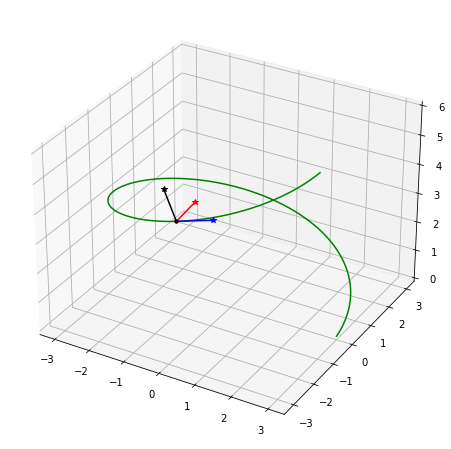

In [27]:
print("Plotting the curve with the velocity vector applied to a point")

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(xh, yh, zh, color="green")
plot_segment(ax, Tf, "blue")
plot_segment(ax, Nf, "red")
plot_segment(ax, Bf, "k")


plt.savefig("./frenet.pdf", dpi=600)
plt.show()
plt.close()

## Helicoid

Finally, we show the plot of the [helicoid](https://en.wikipedia.org/wiki/Helicoid) curve.

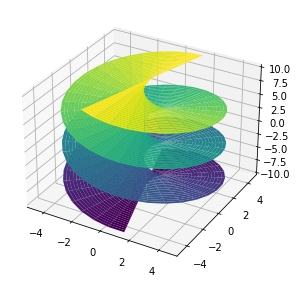

In [28]:
from sympy import *
from sympy.plotting import *

u,v=symbols('u v')

x_helic = -u*cos(v)
y_helic = u*sin(v)
z_helic = 2*v

p_hc = plot3d_parametric_surface(x_helic, y_helic , z_helic, (u, -5, 5), (v, -5, 5))

We need a little trick to save the plot


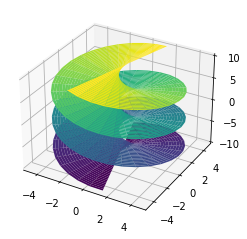

In [29]:
print("We need a little trick to save the plot")
backend = p_hc.backend(p_hc) # object editable with matplotlib
backend.process_series() # take into account what is contained inside f0
backend.fig.savefig('helicoid.pdf', dpi=1200) # saving a .pdf

In [30]:
print("Plotting the helicoid from numerically evaluated points:")

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

# generating a lattice of points for u and v
u = np.linspace(-5, 5, 32)
u, v = np.meshgrid(u, u)

x_hc = -u*np.cos(v) # x(u,v)
y_hc = u*np.sin(v) # y(u,v)
z_hc = 2*v # z(u,v)



Plotting the helicoid from numerically evaluated points:


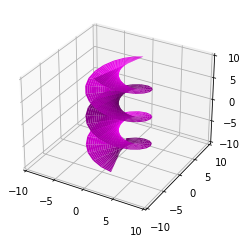

In [31]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-10, 10)
ax.set_ylim3d(-10, 10)
ax.set_zlim3d(-10, 10)

ax.plot_surface(x_hc, y_hc, z_hc, color="magenta", rstride = 1, cstride = 1)
plt.show()